# LA-ICP-MS dataset processing
## required packets

In [1]:
from process_image import *

## basic settings
set some basic infos for the image procesing

In [2]:
settings = getBaseSettings()

# show debugging output
settings["showDebuggingOutput"] = True
# set the physical spot distance in µm
settings["spot_distance_x"]     = 7.0
# set the physical spot distance in µm
settings["spot_distance_y"]     = 0.579150579150579

# change interpolation between the lines in x direction [integer, 0 disables this option]
settings["stretch_x"]           = 6
# set the gaussian filter size in y direction [integer, 0 disables this option]
settings["smooth_y"]            = 3

## set the data source
select the datasource - if load_raw = True, the script expects a path to the raw dataset consisting of multiple *.xl files. Else, the script expects an excel file with multiple sheets.

If no `workingDirectory` or `excel_file` is set, the script opens a file dialog.


In [3]:
settings["load_raw"]     = True
settings["workingDirectory"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "raw format" + os.sep

#settings["load_raw"]   = False
#settings["excel_file"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "excel_example.xlsx"

In [4]:
laser_data = LA_ICP_MS_LOADER(settings)

Selected working directory: E:\GIT\LA-ICP-MS\example_data\raw format\
loaded a dataset with the dimensions of 15 x 500 datapoints and 18 elements:
['²³Na', '²⁴Mg', '²⁷Al', '³⁹K', '⁴⁷Ti', '⁵¹V', '⁵²Cr', '⁵⁵Mn', '⁶⁶Zn', '¹³⁷Ba', '⁸⁸Sr', '³¹P', '³⁵Cl', '⁶³Cu', '⁶⁰Ni', '²⁰⁸Pb', '⁸⁵Rb', '⁷⁵As']


# show an example image (first element in the set)

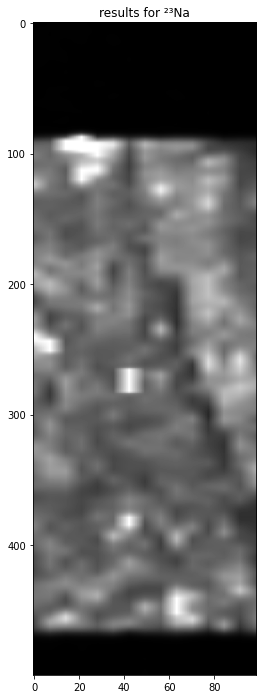

In [5]:
laser_data.show_single_image( )

## show in the napari viewer
A new window will open. Cell execution will continue in between.

In [6]:
selected_elements = ['Na23', 'Rb85', 'Ti47']
laser_data.show_image_set() # selected_elements

## saving images
uncomment the following line if the results should be saved

In [7]:
# laser_data.save_images()

# experiments with superpixels for segmentation
the following code is work in progress!

In [8]:
import cv2
import time
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed, mark_boundaries
from skimage import color
from matplotlib.colors import LinearSegmentedColormap

In [9]:
element = laser_data.get_first_element()
def process_SLIC_of_element(element):
    img, _ = laser_data.optimize_img( laser_data.images[element] )

    img_8bit = img * 255
    img_8bit = img_8bit.astype(np.uint8)
    denoised = cv2.fastNlMeansDenoising( img_8bit, 13, 19, 35 )

    #from skimage.future import graph

    segments_slic = slic(denoised, n_segments=220, compactness=0.25, sigma=1,
                        start_label=1)

    out1 = color.label2rgb(segments_slic, img, kind='avg', bg_label=0)# color.rgb2gray( color.label2rgb(segments_slic, img, kind='avg', bg_label=0) )
    
    # Show the segmentations.
    fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(18, 7),
                            sharex=True, sharey=True)
    ax = axes.ravel()
    cmap = laser_data.get_color_by_element(element, napari_cmap=False)

    #colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
    #cmap = LinearSegmentedColormap.from_list(
    #        "Custom", colors, N=256)

    ax[0].imshow(img, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap=cmap, interpolation=None);
    ax[0].set_title('Image [{}]'.format(laser_data.elements[element]))

    ax[1].imshow(denoised, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap=cmap, interpolation=None);
    ax[1].set_title('denoised')

    ax[2].imshow(mark_boundaries(img, segments_slic), aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap=cmap, interpolation=None);
    ax[2].set_title('SLIC superpixels')

    #ax[3].imshow(segments_slic, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap=cmap, interpolation=None);
    #ax[3].set_title('SLIC superpixels')

    ax[3].imshow(out1, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap=cmap, interpolation=None);
    ax[3].set_title('mean values in slic')

    for a in ax:
        a.axis('off')
    fig.tight_layout()
    plt.show()


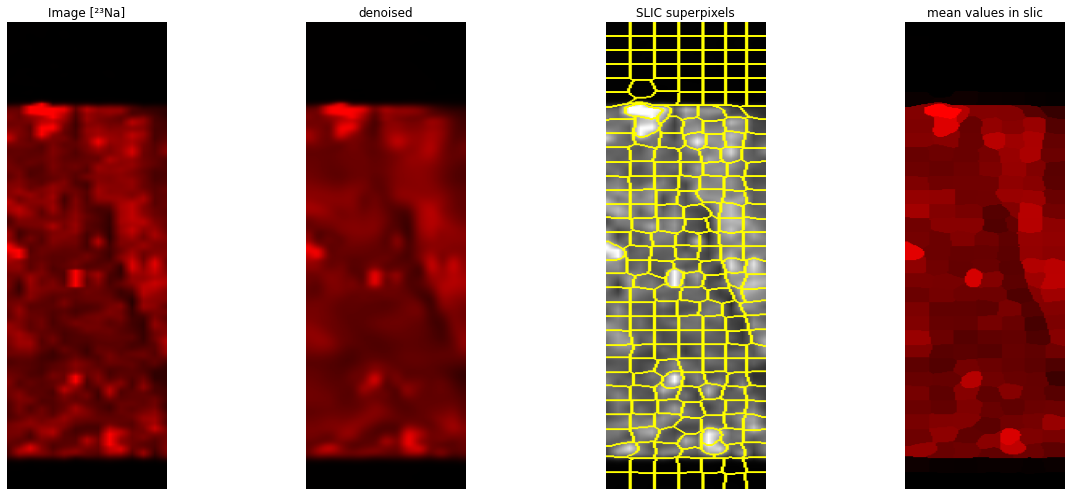

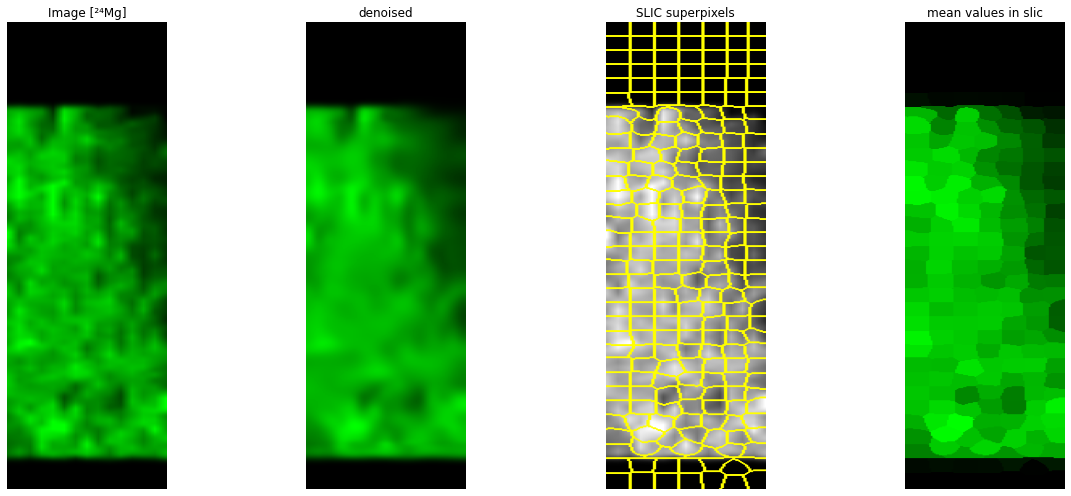

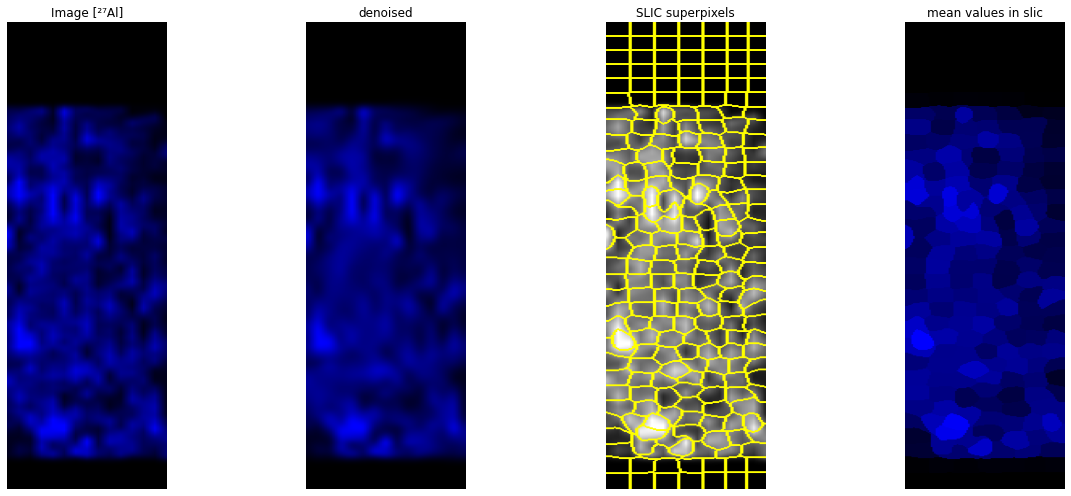

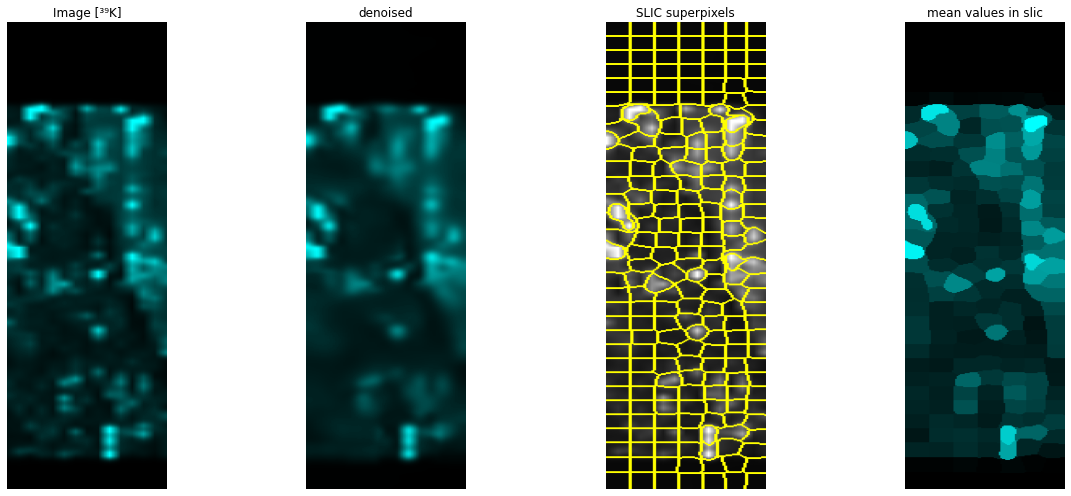

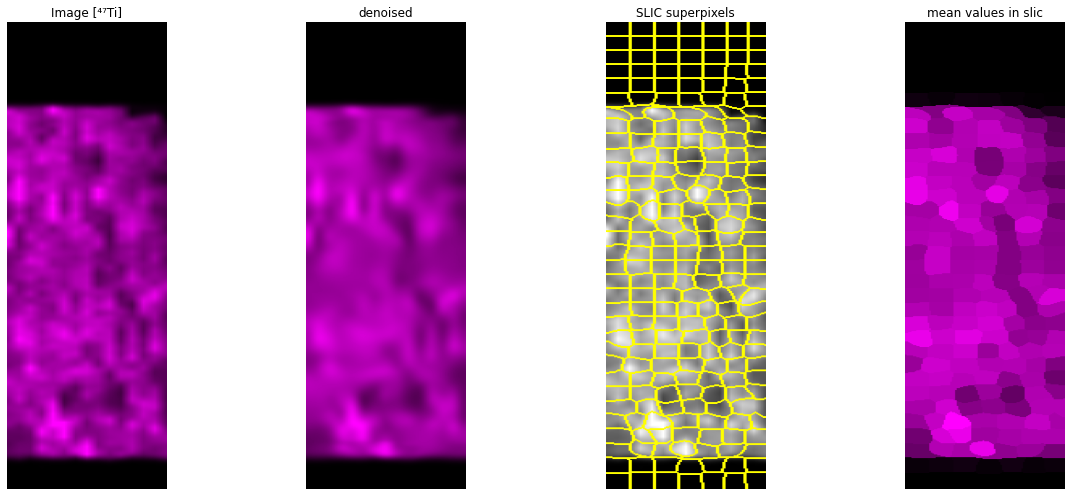

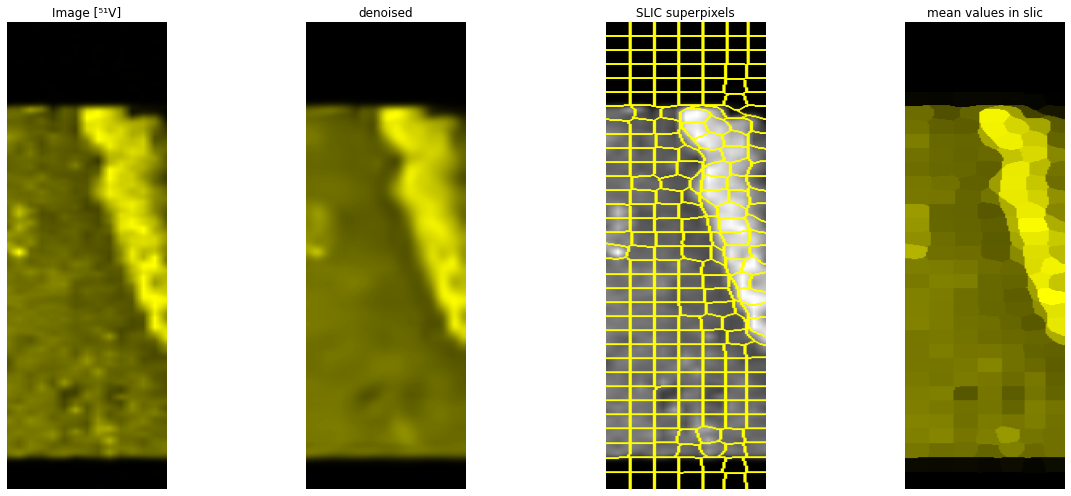

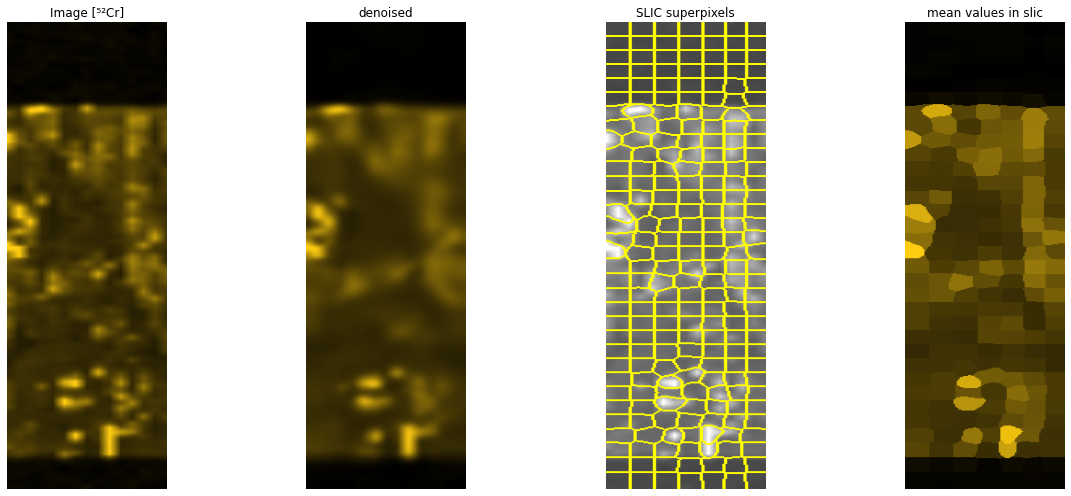

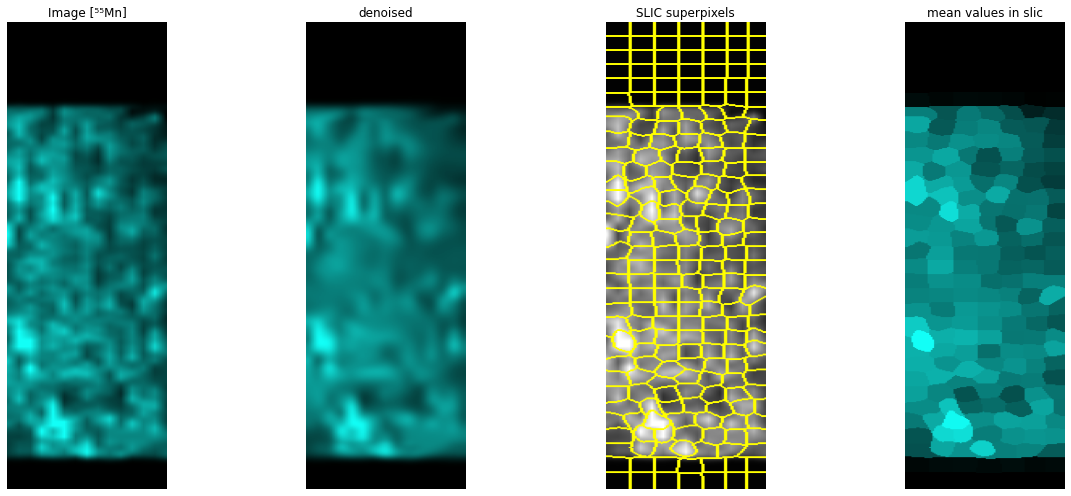

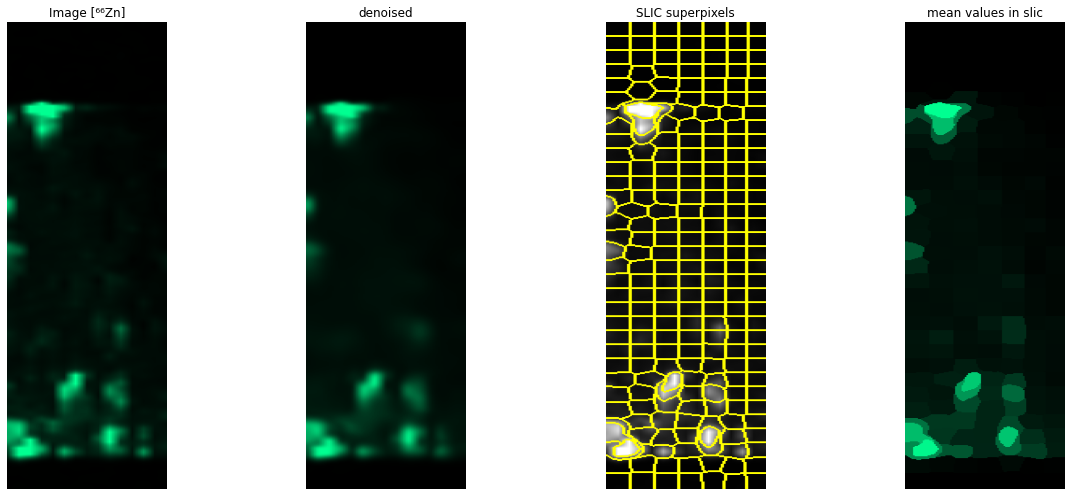

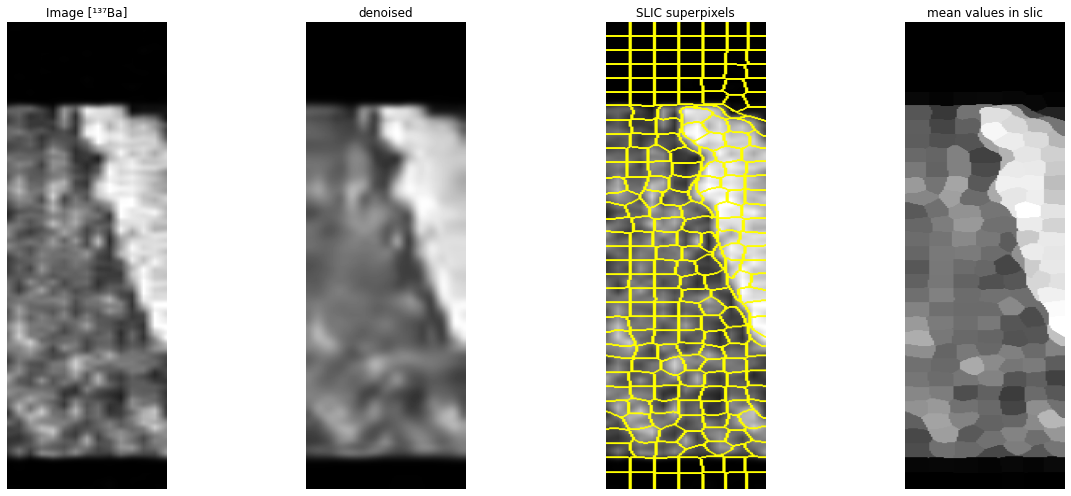

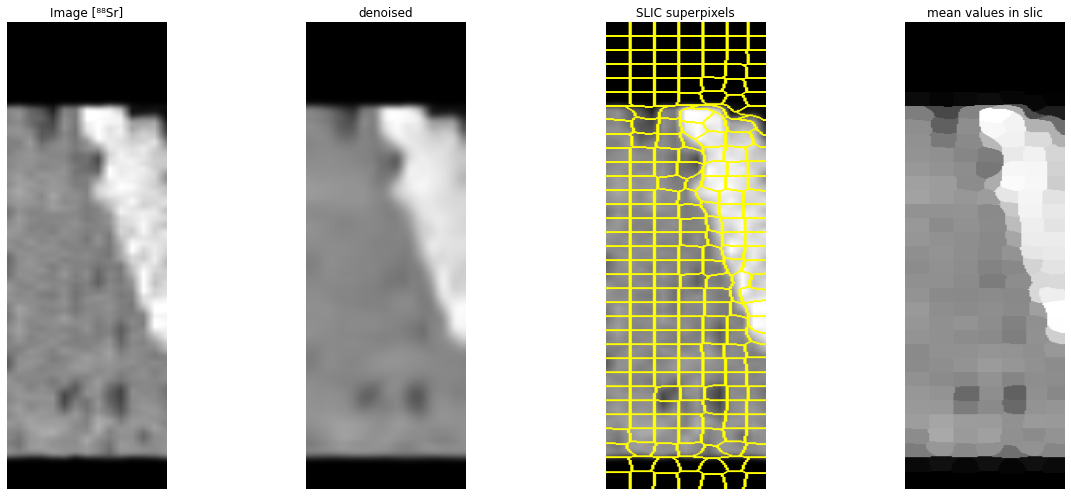

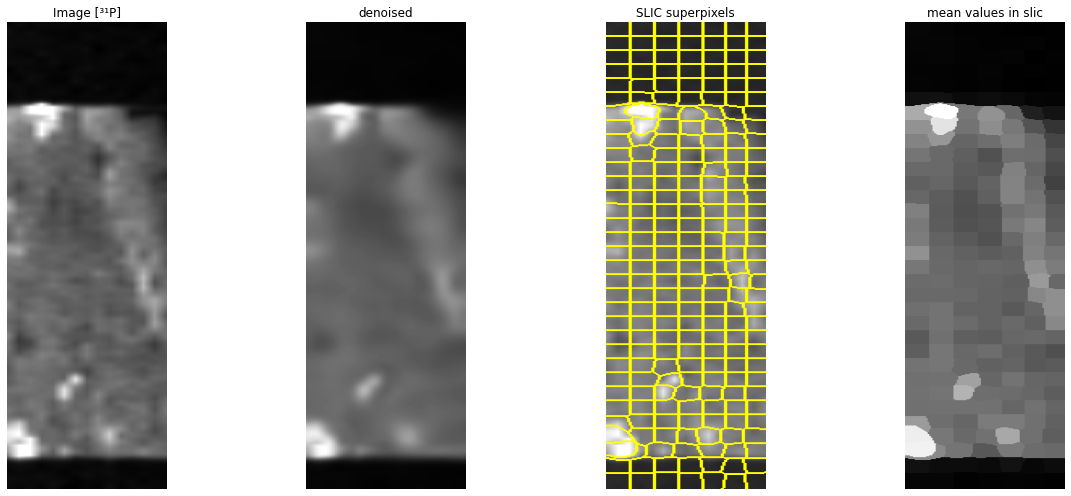

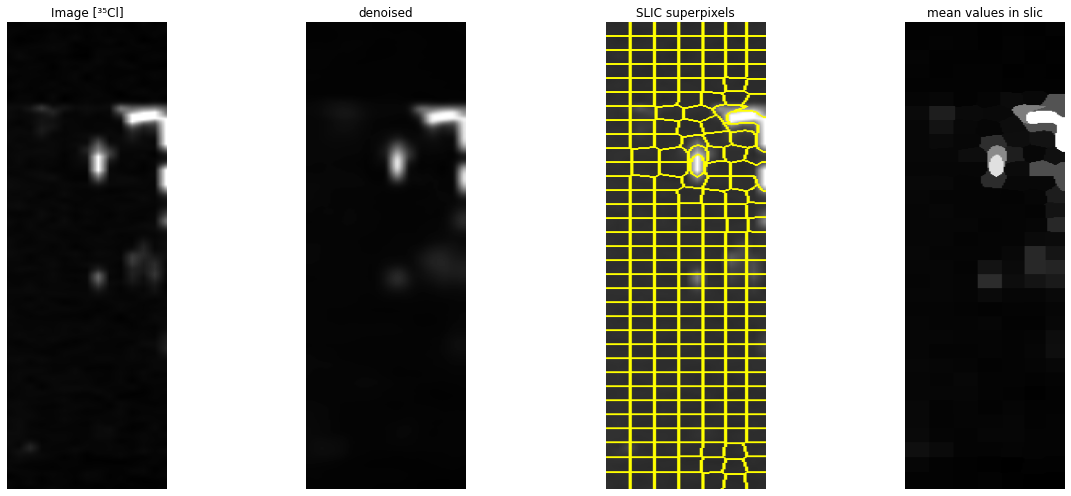

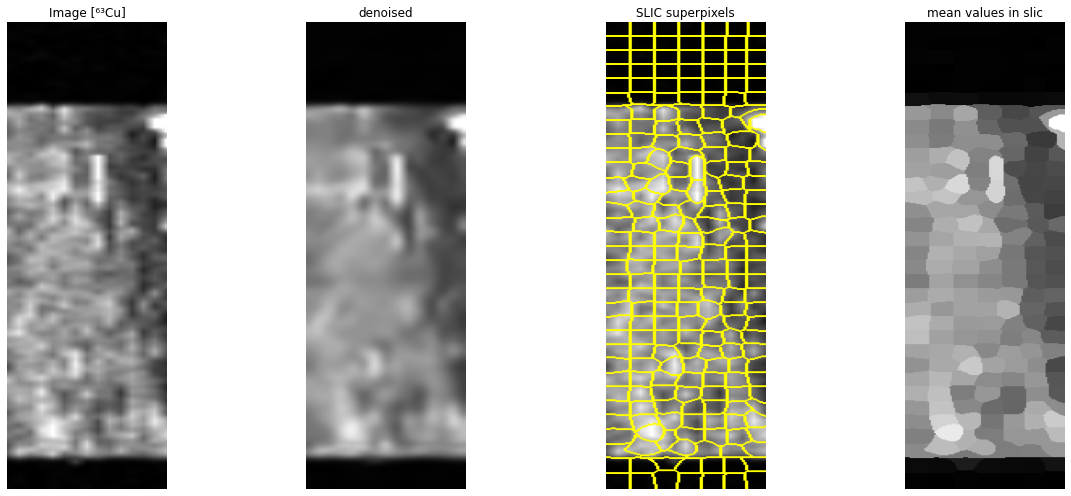

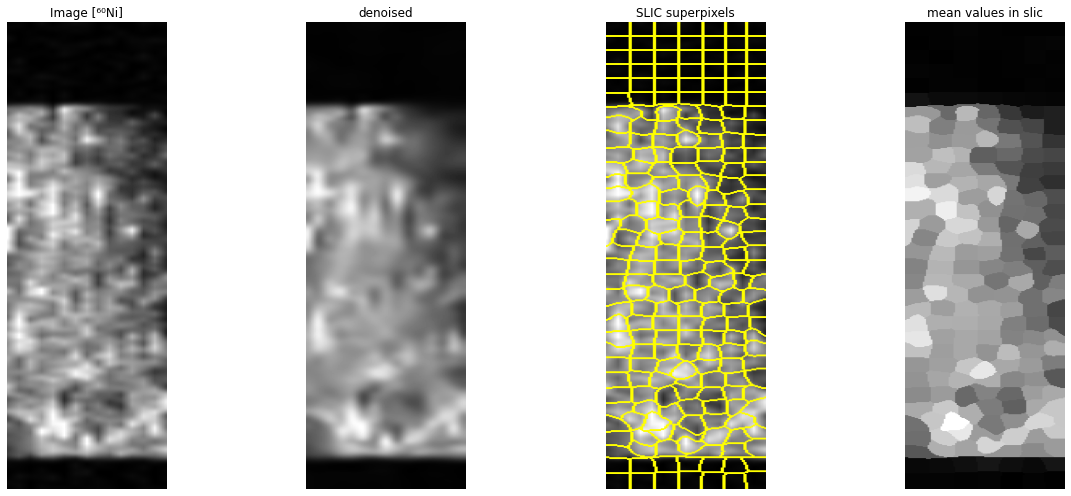

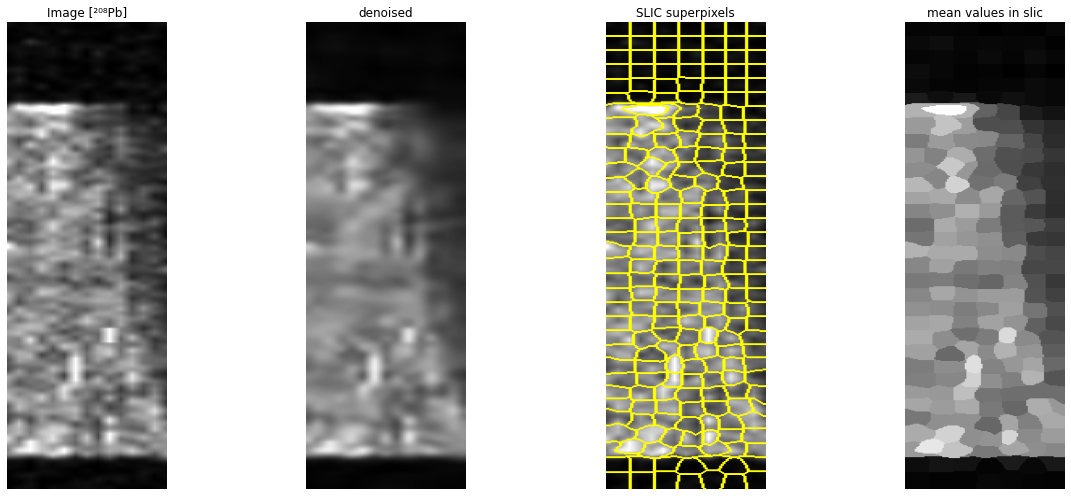

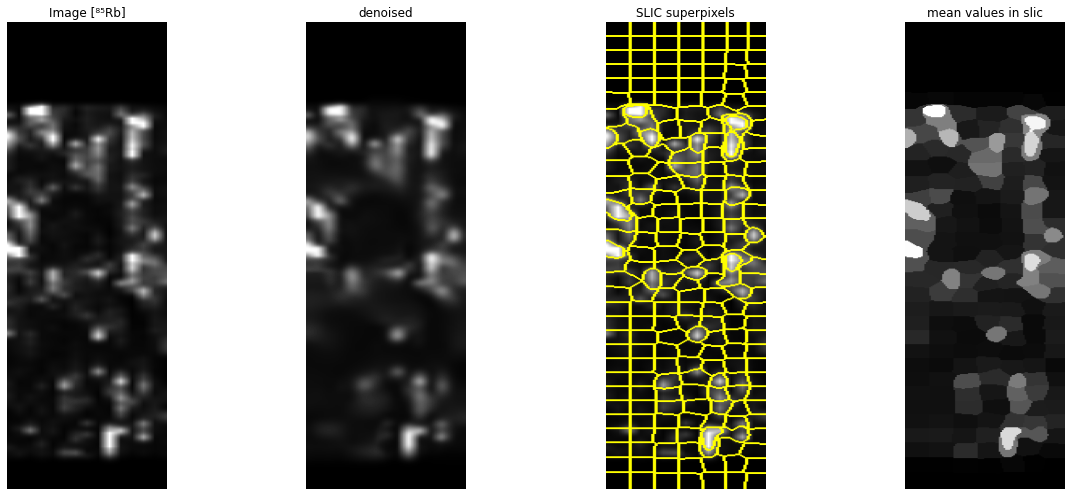

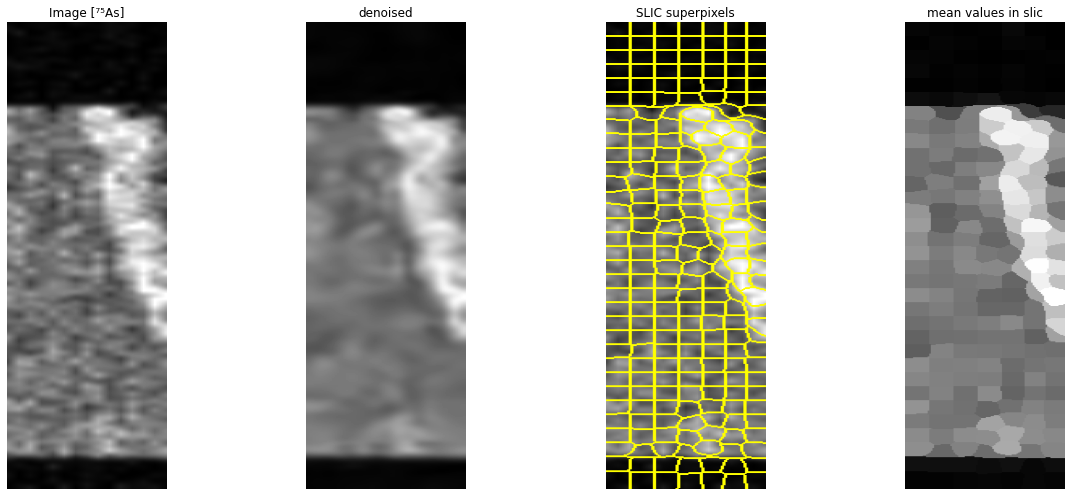

In [10]:
for element in laser_data.elements.keys():
    process_SLIC_of_element(element)


In [11]:
out1_slic = quickshift(out1, kernel_size=3, max_dist=6, ratio=0.5)#, n_segments=100, compactness=0.05, sigma=5, start_label=1)
plt.imshow(mark_boundaries(out1, out1_slic), aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap='gray', interpolation=None)

NameError: name 'out1' is not defined